In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [18]:
spotify = pd.read_csv("../data/spotify_dataset.csv")
grammys = pd.read_csv("../data/the_grammy_awards.csv")

In [19]:
print("Spotify shape:", spotify.shape)
print("Grammys shape:", grammys.shape)

Spotify shape: (114000, 21)
Grammys shape: (4810, 10)


In [20]:
styled = spotify.head(10).style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#1DB954'),
                                  ('color', 'white'),
                                  ('font-weight', 'bold')]}]
).set_properties(**{'text-align': 'left'})
display(styled)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676000,0.461000,1,-6.746000,0,0.143000,0.032200,0.000001,0.358000,0.715000,87.917000,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420000,0.166000,1,-17.235000,1,0.076300,0.924000,0.000006,0.101000,0.267000,77.489000,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438000,0.359000,0,-9.734000,1,0.055700,0.210000,0.000000,0.117000,0.120000,76.332000,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266000,0.059600,0,-18.515000,1,0.036300,0.905000,0.000071,0.132000,0.143000,181.740000,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618000,0.443000,2,-9.681000,1,0.052600,0.469000,0.000000,0.082900,0.167000,119.949000,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688000,0.481000,6,-8.807000,1,0.105000,0.289000,0.000000,0.189000,0.666000,98.017000,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407000,0.147000,2,-8.822000,1,0.035500,0.857000,0.000003,0.091300,0.076500,141.284000,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703000,0.444000,11,-9.331000,1,0.041700,0.559000,0.000000,0.097300,0.712000,150.960000,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625000,0.414000,0,-8.700000,1,0.036900,0.294000,0.000000,0.151000,0.669000,130.088000,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442000,0.632000,1,-6.770000,1,0.029500,0.426000,0.004190,0.073500,0.196000,78.899000,4,acoustic


In [21]:
pd.set_option("display.max_columns", None)   
pd.set_option("display.max_colwidth", None)
styled = grammys.head(10).style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#EEDD82'),
                                  ('color', 'white'),
                                  ('font-weight', 'bold')]}]
).set_properties(**{'text-align': 'left'})
display(styled)

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Finneas O'Connell, engineers/mixers; John Greenham, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Billie%2BEilish/Billie%2520Eilish_1_1_1594138954.jpg?itok=3-71Dfxh,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin Vernon, producers; BJ Burton, Zach Hanson & Chris Messina, engineers/mixers; Greg Calbi, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Bon%2BIver/Bon%2520Iver_1_1_1578385181.jpg?itok=_M1hc5Ux,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster & Victoria Monet, producers; Serban Ghenea, John Hanes, Billy Hickey & Brendan Morawski, engineers/mixers; Randy Merrill, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Ariana%2BGrande/Ariana%2520Grande_1_1_1578384678.jpg?itok=Amj90j13,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph Hurtado, Jaycen Joshua, Derek Keota & Miki Tsutsumi, engineers/mixers; Colin Leonard, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/H.E.R./H.E.R._1_1_1594631035.jpg?itok=ClJe-2MN,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar Carlson, Jon Castelli, Josh Deguzman, John Kercy, Denis Kosiak, Guy Lawrence & Michael Romero, engineers/mixers; Dale Becker, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Khalid/Khalid_1_1_1594578772.jpg?itok=2HxjAT-X,True
5,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,"Andrew ""VoxGod"" Bolooki, Jocelyn “Jozzy” Donald & YoungKio, producers; Andrew ""VoxGod"" Bolooki, Cinco & Joe Grasso, engineers/mixers; Eric Lagg, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Montero%2BLamar%2BHill/Lil%2520Nas%2520X_1_1_1581656760.jpg?itok=_YR6dOjI,True
6,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Truth Hurts,Lizzo,"Ricky Reed & Tele, producers; Chris Galland, Manny Marroquin & Ethan Shumaker, engineers/mixers; Chris Gehringer, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Lizzo/Lizzo_1_1_1583931631.jpg?itok=Gm2FQx4s,True
7,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Sunflower,Post Malone & Swae Lee,"Louis Bell & Carter Lang, producers; Louis Bell & Manny Marroquin, engineers/mixers; Mike Bozzi, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Post%2BMalone/Post%2520Malone_1_1_1594910341.jpg?itok=HCyRm13g,True
8,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Album Of The Year,"When We All Fall Asleep, Where Do We Go?",Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Finneas O'Connell, engineers/mixers; Billie Eilish O'Connell & Finneas O'Connell, songwriters; John Greenham, mastering engineer",https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Billie%2BEilish/Billie%2520Eilish_1_1_1594138954.jpg?itok=3-71Dfxh,True
9,2019,62nd Ann

In [22]:
def quick_info(df, name):
    print(f" Dataset: {name}")
    display(pd.DataFrame({
        "dtype": df.dtypes,
        "n_nulls": df.isna().sum(),
        "null_%": round(100 * df.isna().mean(), 2)
    }).sort_values("null_%", ascending=False))
    print(f"Duplicados: {df.duplicated().sum()} filas")

quick_info(spotify, "Spotify")
quick_info(grammys, "Grammys")


 Dataset: Spotify


,dtype,n_nulls,null_%
Unnamed: 0,int64,0,0.0
track_id,object,0,0.0
artists,object,1,0.0
album_name,object,1,0.0
track_name,object,1,0.0
popularity,int64,0,0.0
duration_ms,int64,0,0.0
explicit,bool,0,0.0
danceability,float64,0,0.0
energy,float64,0,0.0


Duplicados: 0 filas
 Dataset: Grammys


,dtype,n_nulls,null_%
workers,object,2190,45.53
artist,object,1840,38.25
img,object,1367,28.42
nominee,object,6,0.12
title,object,0,0.00
year,int64,0,0.00
category,object,0,0.00
updated_at,object,0,0.00
published_at,object,0,0.00
winner,bool,0,0.00


Duplicados: 0 filas


In [23]:
print("🎶 SPOTIFY — Data Types")
display(spotify.dtypes.to_frame("dtype"))

print("\n🎶 SPOTIFY — Missing Values")
display(spotify.isna().sum().to_frame("missing").sort_values("missing", ascending=False))




🎶 SPOTIFY — Data Types


,dtype
Unnamed: 0,int64
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64



🎶 SPOTIFY — Missing Values


,missing
artists,1
track_name,1
album_name,1
Unnamed: 0,0
track_id,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [24]:
print(" SPOTIFY — Data Types")
display(grammys.dtypes.to_frame("dtype"))

print("\n SPOTIFY — Missing Values")
display(grammys.isna().sum().to_frame("missing").sort_values("missing", ascending=False))




 SPOTIFY — Data Types


,dtype
year,int64
title,object
published_at,object
updated_at,object
category,object
nominee,object
artist,object
workers,object
img,object
winner,bool



 SPOTIFY — Missing Values


,missing
workers,2190
artist,1840
img,1367
nominee,6
title,0
year,0
category,0
updated_at,0
published_at,0
winner,0


In [25]:
print(" Variables clave Spotify: ['artist', 'track_name', 'streams', 'popularity', 'year']")
print(" Variables clave Grammys: ['artist', 'category', 'nominee', 'year', 'winner']")


 Variables clave Spotify: ['artist', 'track_name', 'streams', 'popularity', 'year']
 Variables clave Grammys: ['artist', 'category', 'nominee', 'year', 'winner']


In [28]:
print("GRAMMYS — Data Types")
display(grammys.dtypes.to_frame("dtype"))

print("GRAMMYS — Missing Values")
display(grammys.isna().sum().to_frame("missing").sort_values("missing", ascending=False))



GRAMMYS — Data Types


,dtype
year,int64
title,object
published_at,object
updated_at,object
category,object
nominee,object
artist,object
workers,object
img,object
winner,bool


GRAMMYS — Missing Values


,missing
workers,2190
artist,1840
img,1367
nominee,6
title,0
year,0
category,0
updated_at,0
published_at,0
winner,0


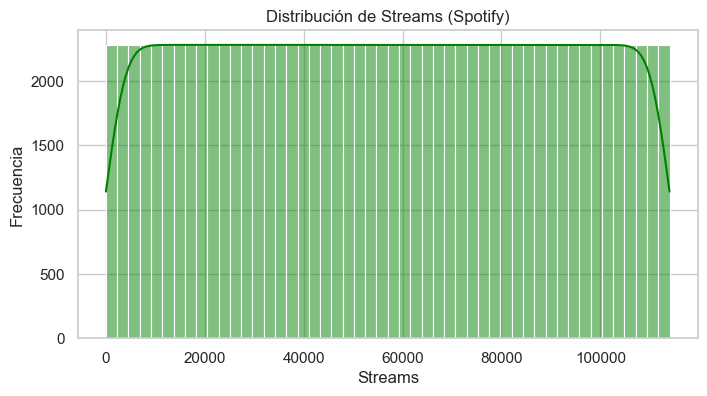

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(spotify.select_dtypes(include="number").iloc[:,0], bins=50, kde=True, color="green")
plt.title("Distribución de Streams (Spotify)")
plt.xlabel("Streams")
plt.ylabel("Frecuencia")
plt.show()

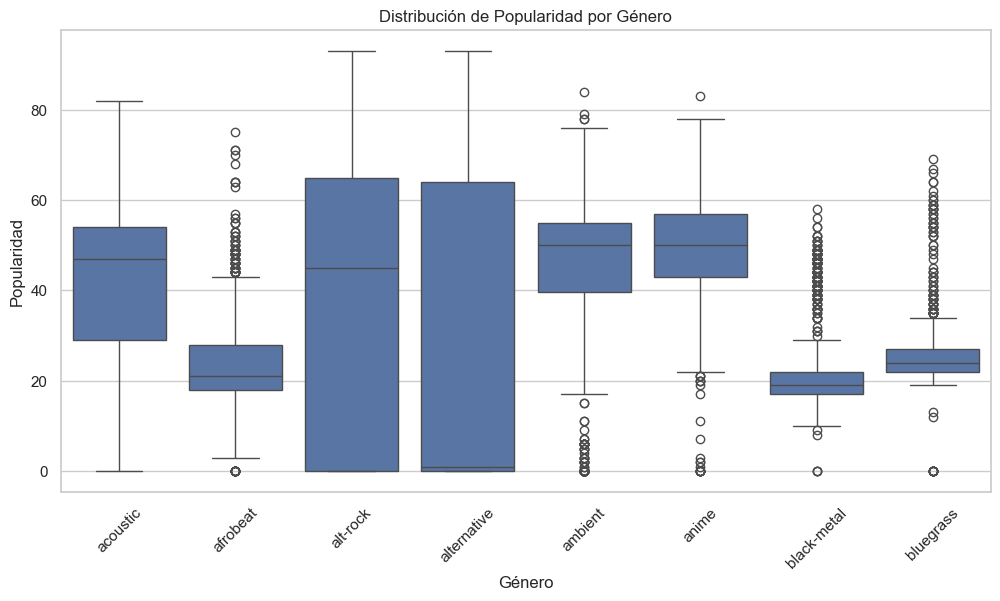

In [44]:
if "track_genre" in spotify.columns:
    top_genres = spotify["track_genre"].value_counts().head(8).index
    plt.figure(figsize=(12,6))
    sns.boxplot(data=spotify[spotify["track_genre"].isin(top_genres)],
                x="track_genre", y="popularity")
    plt.title("Distribución de Popularidad por Género")
    plt.xlabel("Género")
    plt.ylabel("Popularidad")
    plt.xticks(rotation=45)
    plt.show()


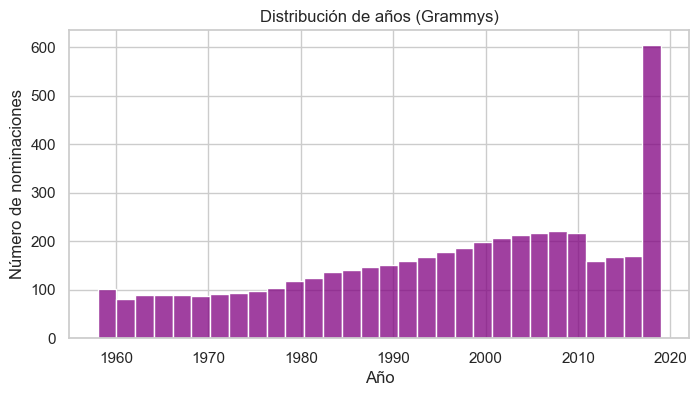

In [33]:
if "year" in grammys.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(grammys["year"], bins=30, color="purple")
    plt.title("Distribución de años (Grammys)")
    plt.xlabel("Año")
    plt.ylabel("Número de nominaciones")
    plt.show()


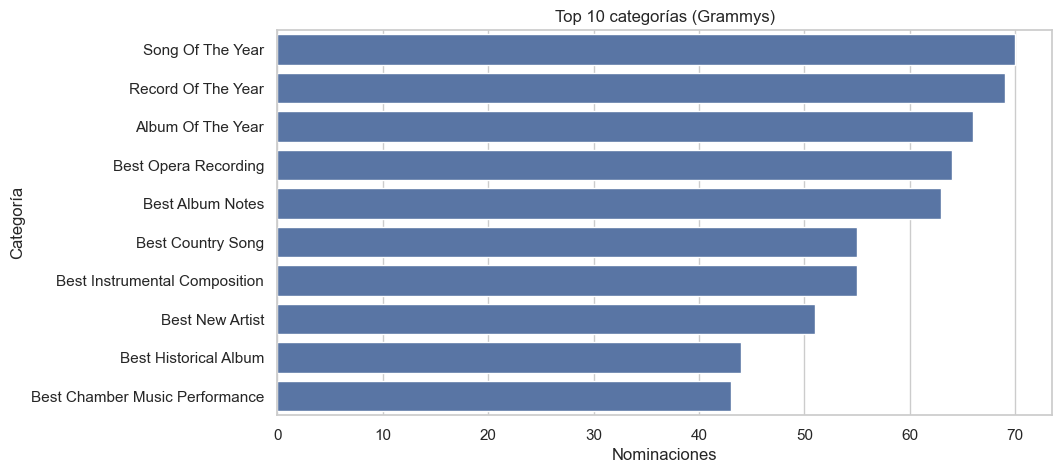

In [35]:
if "category" in grammys.columns:
    top_cat = grammys["category"].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_cat.values, y=top_cat.index)
    plt.title("Top 10 categorías (Grammys)")
    plt.xlabel("Nominaciones")
    plt.ylabel("Categoría")
    plt.show()

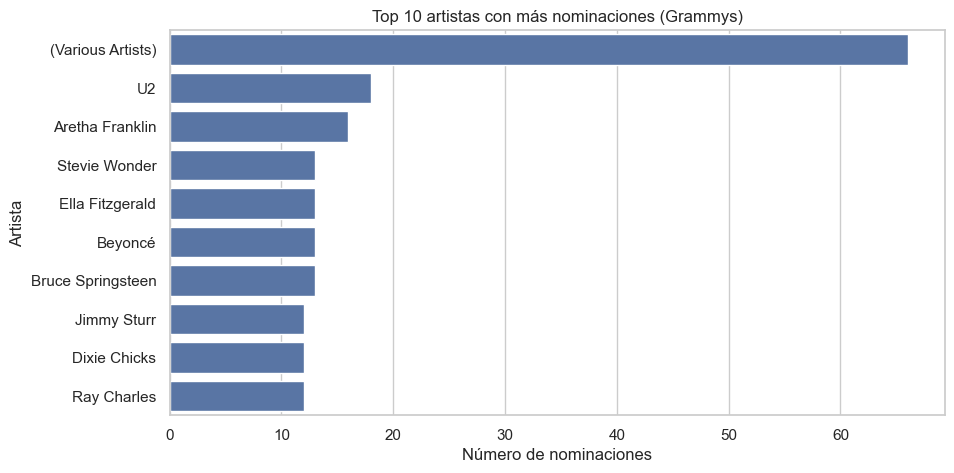

In [37]:
if "artist" in grammys.columns:
    top_art = grammys["artist"].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_art.values, y=top_art.index)
    plt.title("Top 10 artistas con más nominaciones (Grammys)")
    plt.xlabel("Número de nominaciones")
    plt.ylabel("Artista")
    plt.show()